In [19]:
from numpy import exp, sqrt, cos, e, pi

# objective function
def getScore(x, y):
	xShifted=x+1.003
	yShifted=y+1.01
	return -20.0 * exp(-0.2 * sqrt(0.5 * (xShifted**2 + yShifted**2))) - exp(0.5 * (cos(2 * pi * xShifted) + cos(2 * pi * yShifted))) + e + 20.5

In [20]:
#!pip3 install scipy
#!pip3 install matplotlib

In [21]:
from scipy.optimize import dual_annealing
bound = [(-5.0, 5.0), (-5.0, 5.0)]
result = dual_annealing( lambda p: getScore(*p), bound)

print(f'best score found: {result.fun :.4f}')
print(f'best parameter values: {result.x[0]:.4f}, {result.x[1]:.4f}')
print(f'number of times function got called: {result.nfev}')

best score found: 0.5000
best parameter values: -1.0030, -1.0100
number of times function got called: 4214


In [22]:
import numpy as np
import itertools

xs = np.arange(-5.0,5.0,0.2)
ys = np.arange(-5.0,5.0,0.2)

bestScore = 9e9
bestParams = []
count = 0

for x,y in itertools.product(xs, ys):
    score = getScore(x,y)
    count += 1
    if score < bestScore:
        bestScore = score
        bestParams = x,y

print(f'best score found: {bestScore :.4f}')
print(f'best parameter values: {bestParams[0]:.4f}, {bestParams[1]:.4f}')
print(f'number of times function got called: {count}')

best score found: 0.5324
best parameter values: -1.0000, -1.0000
number of times function got called: 2500


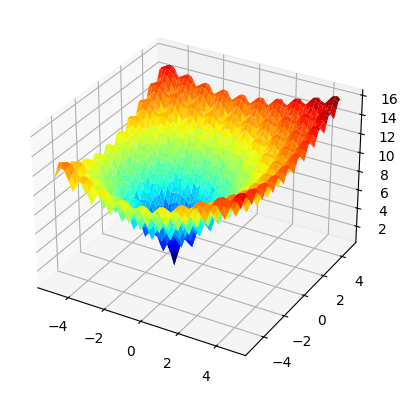

In [24]:
# results = getScore( *np.meshgrid(xs, ys))

# print(results.min(), results.argmin())

x,y = np.meshgrid(xs,ys)

results = getScore(x, y)

#print(results.min(), results.argmin())

import matplotlib.pyplot as plt

ax = plt.axes( projection = '3d')
ax.plot_surface( x, y, results, cmap= 'jet')